Занятие 4. Кластеризация методом k-means (k-средних).
=============

Полезные ссылки:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/clustering.html

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

Пример 1. Beverage
--------

In [2]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/1_beverage/")


In [3]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать число кластеров k. 
Попробуем k = 3. 

Надо ли стандартизовать переменные?

In [4]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=3, random_state=42, max_iter=300, n_init=10, verbose=0 )
# random_state - зерно датчика случайных чисел. 
# При повторном вызове с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.

In [5]:
# подгонка модели по данным из df
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [7]:
# Результат кластеризации на данных df
model.labels_

array([0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1])

In [8]:
# координаты центров кластеров
model.cluster_centers_

array([[ 7.27272727e-01,  2.72727273e-01,  9.09090909e-02,
         9.09090909e-02,  4.54545455e-01,  1.00000000e+00,
         9.09090909e-02,  4.54545455e-01],
       [ 1.11022302e-16,  1.00000000e+00,  5.45454545e-01,
         5.45454545e-01, -5.55111512e-17, -5.55111512e-17,
         9.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  8.33333333e-02,
        -2.77555756e-17,  9.16666667e-01, -5.55111512e-17,
        -5.55111512e-17,  3.33333333e-01]])

In [9]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

array([0, 2])

Как определить число кластеров? Не угадывая.
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

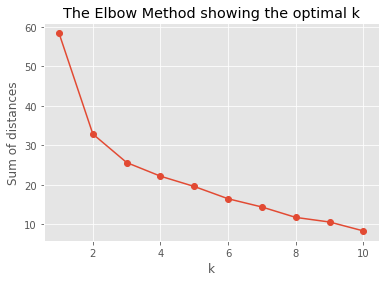

In [12]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что три кластера -- это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [13]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


Выше получаем те же значения, что и в model.cluster_centers_

In [14]:
df.groupby('cluster').size()

cluster
0    11
1    11
2    12
dtype: int64

Пример 2. Кластеризация претендентов.
----------------------

In [3]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent")

In [4]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [5]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

Надо ли стандартизовать переменные?

Подготовка данных завершена.
Следующий шаг - определение числа кластеров

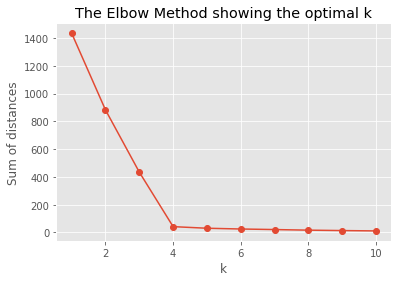

In [8]:
from sklearn.cluster import KMeans

# Выбираем число кластеров. От 2 до 10
K = range(2, 11)

# Строим 10 моделей с разным числом кластеров
# Не рационально, зачем сохранять модель, достаточно хранить только model.inertia_
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df) for k in K]

#  Качество кластеризации содержится в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
# Добавляем на график текст
plt.xlabel('k')
plt.ylabel('Качество кластеризации - сумма расстояний')
plt.title('Каменистая осыпь для определения числа кластеров')
plt.show()

In [ ]:
Вывод: число кластеров равно 4. Строим окончательную модель.

In [19]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


Пример 3. Потребление протеинов в Европе
---------------------

In [3]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/3_Protein Consumption in Europe")

In [4]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [7]:
from sklearn.cluster import KMeans

In [8]:
# Стандартизируем данные
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

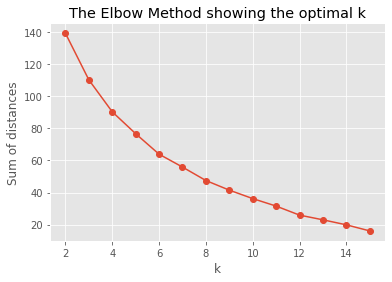

In [9]:
K = range(2, 16)
models = [KMeans(n_clusters=k).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
model = KMeans(n_clusters=5)
model.fit(X)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,9.850000,7.050000,3.150000,26.675000,8.225,22.675000,4.550000,1.175000,2.125000
1,8.125000,3.800000,2.475000,11.200000,7.625,33.675000,3.975000,5.675000,7.075000
2,12.677778,10.744444,3.955556,20.044444,3.600,24.688889,4.855556,1.922222,4.111111
3,7.800000,9.650000,2.625000,14.525000,2.075,38.525000,5.325000,2.975000,4.425000
4,7.125000,4.675000,1.200000,9.450000,0.750,51.125000,1.950000,5.050000,2.975000


In [15]:
df['cluster'].sort_values()

Country
Norway            0
Denmark           0
Finland           0
Sweden            0
Italy             1
Spain             1
Portugal          1
Greece            1
UK                2
Netherlands       2
W_Germany         2
Switzerland       2
France            2
E_Germany         2
Belgium           2
Austria           2
Ireland           2
Czechoslovakia    3
Poland            3
USSR              3
Hungary           3
Albania           4
Bulgaria          4
Romania           4
Yugoslavia        4
Name: cluster, dtype: int32

##  Тест